In [1]:
import pandas as pd
import pickle
import wordcloud
import json
import os
import nltk
import re
import string

ModuleNotFoundError: No module named 'pandas'

In [2]:
global_path = '~/Desktop/Datasets/art/art_writing'
path = 'artnet_articles'
#path = 'artnet_articles'
#path = 'artnet_articles'
folderpath = os.path.expanduser(os.path.join(global_path, path))

filelist = os.listdir(folderpath)

In [189]:
data = {}
data_df = pd.DataFrame(data)

cleaned_titles = []
cleaned_paras = []

for file in filelist[:1000]:
    filepath = os.path.join(folderpath, file)
    f = open(filepath) #, encoding='ascii', errors='ignore')
    try:
        j_import = json.load(f)
        j_import = j_import[0]
        #print(j_import)
        #title = j_import['title']
        try:
            para = j_import['para']
            para = para[0]
            para = para.replace("	", "").replace("Follow  on Facebook:", '').replace("\n", ' ')
            para = para.replace("\r" , " ")
            para = para.strip()
            #print(para)

            title = j_import['title']
            title = title.replace("	", "").replace("\n", ' ')
            title = title.replace("\r" , " ")
            title = title.strip()
                        
            #text = para
            #cleaned_paras.append(text)
            #print(para)
            
            new_row = {"title" : title , "para" : para}
            data_df = data_df.append(new_row, ignore_index=True)
            f.close()

        except KeyError:
            f.close()
            pass

    except json.decoder.JSONDecodeError:
        f.close()
        pass
data_df

para  \
0    Ever wish you could own the first footprint from Buzz Aldrin’s moonwalk? Now you can. Well, sort of. One of the more remarkable offerings featured in Heritage Auctions’ Space Exploration Signature Auction is a plaster casting of a boot similar to the one Aldrin wore during the 1969 Apollo 11 moon landing, according to Art Daily . Estimated to fetch more than $10,000, the plaster cast also features the astronaut’s 14-inch-long signature carved into the original plaster. The cast is one in an ...   
1    The Grand Rapids, Michigan-based public art extravaganza known as ArtPrize revealed the winners of $500,000 in prizes on October 7, with the two $200,000 Grand Prizes going to James Mellick and Stacey Kirby. Mellick was selected through the public vote, for his piece Wounded Warrior Dogs , while a jury of art experts singled out Kirby’s The Bureau of Personal Belonging . Since voting began September 21, 37,433 visitors cast 380,119 ballots, with more votes coming through the ArtPrize mobile ...   
2    Kate Ericson and Mel Ziegler are two unsung heroes of socially-conscious conceptualism, and this is their “Give and Take,” on view for another week in a mini-retrospective at Galerie Perrotin in New York. (Click on my image for a closeup.) There’s a very obvious link to Marcel Duchamp’s “In Advance of a Broken Arm,” the snow-shovel-as-art that Duchamp came up with in 1915, as one of the first-ever readymades. (A version of that work is in the Duchamp exhibition at Gagosian gallery that I sho...   
3    The light artist James Turrell has announced that he will allow an exclusive group of visitors to access the Roden Crater, a volcanic cinder cone that he acquired in 1977 and that he has been turning into an epic land art–work ever since, In Collect reports . The 400,000-year-old extinct volcanic crater is located near Arizona’s Painted Desert, “an area where you feel geologic time,” and where “you have a strong feeling of standing on the surface of the planet,” according to Turrell . His go...   
4    Adrian Rosenfeld, a longtime Matthew Marks director, will launch a gallery under his own name in San Francisco in early 2017, reports the San Francisco Chronicle . Rosenfeld worked at Marks for some 15 years, and was a principal at New York’s Grimm/Rosenfeld Gallery, with locations in New York and Munich. At Marks, Rosenfeld was part of a team representing giants such as Robert Gober, Nan Goldin, Jasper Johns, and Martin Puryear. He worked as a consultant in Los Angeles and San Francisco aft...   
..                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ...   
995  This interview was first published on Arteviste. It has been lightly edited.  Brixton-based painter Milla Eastwood and I first met at the preview of her critically-acclaimed solo exhibition Drunk on Colour at the Dot Project in Chelsea, London. Although I have always favored gestural, abstract paintings, I was yet to experience her energy and dynamic color palette. She composes her expressive work in her expansive Brixton studio, and sometimes even ventures to botanical gardens and natural l...   
996  The publisher and CEO of ARTnews magazine, Izabela Depczyk, who took the helm in June 2014, has announced her resignation with immediate effect. Depczyk, who’s also the president of the board, is stepping down only four months after the merger of 113-year-old magazine ARTnews with Art in America , The  Magazine Antiques , and Modern Magazine , publications owned by newsprint magnate and art collector Peter Brant. According to A

In [190]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [191]:
data_df = data_df.set_index('title')
data_df

para
title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
Buzz Aldrin Moon Footprint up for Auction                                                                     Ever wish you could own the first footprint from Buzz Aldrin’s moonwalk? Now you can. Well, sort of. One of the more remarkable offerings featured in Heritage Auctions’ Space Exploration Signature Auction is a plaster casting of a boot similar to the one Aldrin wore during the 1969 Apollo 11 moon landing, according to Art Daily . Estimated to fetch more than $10,000, the plaster cast also features the astronaut’s 14-inch-long signature carved into the original plaster. The cast is one in an ...
ArtPrize Gives Top Honors to Dog Sculptures and a Recreated 1960s Office                                      The Grand Rapids, Michigan-based public art extravaganza known as ArtPrize revealed the winners of $500,000 in prizes on October 7, with the two $200,000 Grand Prizes going to James Mellick and Stacey Kirby. Mellick was selected through the public vote, for his piece Wounded Warrior Dogs , while a jury of art experts singled out Kirby’s The Bureau of Personal Belonging . Since voting began September 21, 37,433 visitors cast 380,119 ballots, with more votes coming through the ArtPrize mobile ...
Ericson + Ziegler’s Functional Art                                                                            Kate Ericson and Mel Ziegler are two unsung heroes of socially-conscious conceptualism, and this is their “Give and Take,” on view for another week in a mini-retrospective at Galerie Perrotin in New York. (Click on my image for a closeup.) There’s a very obvious link to Marcel Duchamp’s “In Advance of a Broken Arm,” the snow-shovel-as-art that Duchamp came up with in 1915, as one of the first-ever readymades. (A version of that work is in the Duchamp exhibition at Gagosian gallery that I sho...
Got $6,500 To Splash? Visit James Turrell’s Roden Crater                                                      The light artist James Turrell has announced that he will allow an exclusive group of visitors to access the Roden Crater, a volcanic cinder cone that he acquired in 1977 and that he has been turning into an epic land art–work ever since, In Collect reports . The 400,000-year-old extinct volcanic crater is located near Arizona’s Painted Desert, “an area where you feel geologic time,” and where “you have a strong feeling of standing on the surface of the planet,” according to Turrell . His go...
Adrian Rosenfeld, Veteran Matthew Marks Director, Launches San Francisco Gallery                              Adrian Rosenfeld, a longtime Matthew Marks director, will launch a gallery under his own name in San Francisco in early 2017, reports the San Francisco Chronicle . Rosenfeld worked at Marks for some 15 years, and was a principal at New York’s Grimm/Rosenfeld Gallery, with locations in New York and Munich. At Marks, Rosenfeld was part of a team representing giants such as Robert Gober, Nan Goldin, Jasper Johns, and Martin Puryear. He worked as a consultant in Los Angeles and San Francisco aft...
...                                                                                                                                                                                                                                                                                                                                            

In [199]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = text.replace('-', ' ')
    text = text.replace("’s ", " ").replace("' ", " ")
    text = text.replace("s’ ", " ").replace("s' ", " ")#remove proper possesives
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [200]:
data_clean = pd.DataFrame(data_df.para.apply(round1))
pd.set_option('display.max_colwidth',500)
data_clean

para
title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
Buzz Aldrin Moon Footprint up for Auction                                                                     ever wish you could own the first footprint from buzz aldrin moonwalk now you can well sort of one of the more remarkable offerings featured in heritage auction space exploration signature auction is a plaster casting of a boot similar to the one aldrin wore during the  apollo  moon landing according to art daily  estimated to fetch more than  the plaster cast also features the astronaut  inch long signature carved into the original plaster the cast is one in an edition of three made by arti...
ArtPrize Gives Top Honors to Dog Sculptures and a Recreated 1960s Office                                      the grand rapids michigan based public art extravaganza known as artprize revealed the winners of  in prizes on october  with the two  grand prizes going to james mellick and stacey kirby mellick was selected through the public vote for his piece wounded warrior dogs  while a jury of art experts singled out kirby the bureau of personal belonging  since voting began september   visitors cast  ballots with more votes coming through the artprize mobile app than ever before for its eighth editio...
Ericson + Ziegler’s Functional Art                                                                            kate ericson and mel ziegler are two unsung heroes of socially conscious conceptualism and this is their “give and take” on view for another week in a mini retrospective at galerie perrotin in new york click on my image for a closeup there a very obvious link to marcel duchamp “in advance of a broken arm” the snow shovel as art that duchamp came up with in  as one of the first ever readymades a version of that work is in the duchamp exhibition at gagosian gallery that i should be daily pic–i...
Got $6,500 To Splash? Visit James Turrell’s Roden Crater                                                      the light artist james turrell has announced that he will allow an exclusive group of visitors to access the roden crater a volcanic cinder cone that he acquired in  and that he has been turning into an epic land art–work ever since in collect reports  the  year old extinct volcanic crater is located near arizona painted desert “an area where you feel geologic time” and where “you have a strong feeling of standing on the surface of the planet” according to turrell  his goal is to turn the in...
Adrian Rosenfeld, Veteran Matthew Marks Director, Launches San Francisco Gallery                              adrian rosenfeld a longtime matthew marks director will launch a gallery under his own name in san francisco in early  reports the san francisco chronicle  rosenfeld worked at marks for some  years and was a principal at new york grimmrosenfeld gallery with locations in new york and munich at marks rosenfeld was part of a team representing giants such as robert gober nan goldin jasper johns and martin puryear he worked as a consultant in los angeles and san francisco after leaving marks in a...
...                                                                                                                                                                                                                                                                                                                                            

In [201]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('new york', 'newyork', text)
    text = re.sub('new year', 'newyear', text)
    text = re.sub('the new museum', 'newmuseum', text)
    #text = text.replace(r'[^\u0020-\u007E]', '')
    return text

round2 = lambda x: clean_text_round2(x)

In [202]:
data_clean = pd.DataFrame(data_clean.para.apply(round2))
data_clean

para
title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
Buzz Aldrin Moon Footprint up for Auction                                                                     ever wish you could own the first footprint from buzz aldrin moonwalk now you can well sort of one of the more remarkable offerings featured in heritage auction space exploration signature auction is a plaster casting of a boot similar to the one aldrin wore during the  apollo  moon landing according to art daily  estimated to fetch more than  the plaster cast also features the astronaut  inch long signature carved into the original plaster the cast is one in an edition of three made by arti...
ArtPrize Gives Top Honors to Dog Sculptures and a Recreated 1960s Office                                      the grand rapids michigan based public art extravaganza known as artprize revealed the winners of  in prizes on october  with the two  grand prizes going to james mellick and stacey kirby mellick was selected through the public vote for his piece wounded warrior dogs  while a jury of art experts singled out kirby the bureau of personal belonging  since voting began september   visitors cast  ballots with more votes coming through the artprize mobile app than ever before for its eighth editio...
Ericson + Ziegler’s Functional Art                                                                            kate ericson and mel ziegler are two unsung heroes of socially conscious conceptualism and this is their give and take on view for another week in a mini retrospective at galerie perrotin in newyork click on my image for a closeup there a very obvious link to marcel duchamp in advance of a broken arm the snow shovel as art that duchamp came up with in  as one of the first ever readymades a version of that work is in the duchamp exhibition at gagosian gallery that i should be daily pic–ing so...
Got $6,500 To Splash? Visit James Turrell’s Roden Crater                                                      the light artist james turrell has announced that he will allow an exclusive group of visitors to access the roden crater a volcanic cinder cone that he acquired in  and that he has been turning into an epic land art–work ever since in collect reports  the  year old extinct volcanic crater is located near arizona painted desert an area where you feel geologic time and where you have a strong feeling of standing on the surface of the planet according to turrell  his goal is to turn the inner ...
Adrian Rosenfeld, Veteran Matthew Marks Director, Launches San Francisco Gallery                              adrian rosenfeld a longtime matthew marks director will launch a gallery under his own name in san francisco in early  reports the san francisco chronicle  rosenfeld worked at marks for some  years and was a principal at newyork grimmrosenfeld gallery with locations in newyork and munich at marks rosenfeld was part of a team representing giants such as robert gober nan goldin jasper johns and martin puryear he worked as a consultant in los angeles and san francisco after leaving marks in aug...
...                                                                                                                                                                                                                                                                                                                                            

In [203]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.para)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

aa  \
title                                                                                                              
Buzz Aldrin Moon Footprint up for Auction                                                                      0   
ArtPrize Gives Top Honors to Dog Sculptures and a Recreated 1960s Office                                       0   
Ericson + Ziegler’s Functional Art                                                                             0   
Got $6,500 To Splash? Visit James Turrell’s Roden Crater                                                       0   
Adrian Rosenfeld, Veteran Matthew Marks Director, Launches San Francisco Gallery                               0   
...                                                                                                           ..   
An Interview With British Artist Milla Eastwood in Her Studio in Brixton, London                               0   
Izabela Depczyk, CEO of ‘ARTnews’ Resigns Four Months After Merger with Brant Publications’ ‘Art in America’   0   
London’s ICA Announces Artists’ Film Biennial Opening in May                                                   0   
The Best and Worst of the Art World This Week in One Minute                                                    0   
How New York’s MoMA Raised More Than $400 Million for Its Expansion in Just Four Years                         0   

                                                                                                              aadla  \
title                                                                                                                 
Buzz Aldrin Moon Footprint up for Auction                                                                         0   
ArtPrize Gives Top Honors to Dog Sculptures and a Recreated 1960s Office                                          0   
Ericson + Ziegler’s Functional Art                                                                                0   
Got $6,500 To Splash? Visit James Turrell’s Roden Crater                                                          0   
Adrian Rosenfeld, Veteran Matthew Marks Director, Launches San Francisco Gallery                                  0   
...                                                                                                             ...   
An Interview With British Artist Milla Eastwood in Her Studio in Brixton, London                                  0   
Izabela Depczyk, CEO of ‘ARTnews’ Resigns Four Months After Merger with Brant Publications’ ‘Art in America’      0   
London’s ICA Announces Artists’ Film Biennial Opening in May                                                      0   
The Best and Worst of the Art World This Week in One Minute                                                       0   
How New York’s MoMA Raised More Than $400 Million for Its Expansion in Just Four Years                            0   

                                                                                                              aai  \
title                                                                                                               
Buzz Aldrin Moon Footprint up for Auction                                                                       0   
ArtPrize Gives Top Honors to Dog Sculptures and a Recreated 1960s Office                                        0   
Ericson + Ziegler’s Functional Art                                                                              0   
Got $6,500 To Splash? Visit James Turrell’s Roden Crater                                                        0   
Adrian Rosenfeld, Veteran Matthew Marks Director, Launches San Francisco Gallery                                0   
...                                                                                                           ...   
An Interview With British Artist Milla Eastwood in Her Studio in Brixton, London                                0   


In [205]:

#data_dtm = pd.read_pickle('dtm.pkl')
data_dtm = data_dtm.transpose()
data_dtm.head()

title   Buzz Aldrin Moon Footprint up for Auction  \
aa                                              0   
aadla                                           0   
aai                                             0   
aala                                            0   
aanant                                          0   

title   ArtPrize Gives Top Honors to Dog Sculptures and a Recreated 1960s Office  \
aa                                                                             0   
aadla                                                                          0   
aai                                                                            0   
aala                                                                           0   
aanant                                                                         0   

title   Ericson + Ziegler’s Functional Art  \
aa                                       0   
aadla                                    0   
aai                                      0   
aala                                     0   
aanant                                   0   

title   Got $6,500 To Splash? Visit James Turrell’s Roden Crater  \
aa                                                             0   
aadla                                                          0   
aai                                                            0   
aala                                                           0   
aanant                                                         0   

title   Adrian Rosenfeld, Veteran Matthew Marks Director, Launches San Francisco Gallery  \
aa                                                                                     0   
aadla                                                                                  0   
aai                                                                                    0   
aala                                                                                   0   
aanant                                                                                 0   

title   The Once-Hot Chinese Art Market Is Struggling to Reignite, According to a New Report  \
aa                                                                                         0   
aadla                                                                                      0   
aai                                                                                        0   
aala                                                                                       0   
aanant                                                                                     0   

title   P. Diddy Zeroes In on Picasso Mural at Gmurzynska’s Art Basel in Miami Beach Booth  \
aa                                                                                       0   
aadla                                                                                    0   
aai                                                                                      0   
aala                                                                                     0   
aanant                                                                                   0   

title   See Raunchy Photos from CalArts in the 1970s  \
aa                                                 0   
aadla                                              0   
aai                                                0   
aala                                               0   
aanant                                             0   

title   Art Industry News: Obama Portraitist Kehinde Wiley Is Launching His Own Artist Residency in Senegal + Other Stories  \
aa                                                                                                                        0   
aadla                                                                                                                     0   
aai                                                                          

In [206]:
# Find the top 30 words said by each comedian
top_dict = {}
indic = []
for ind, column in enumerate(data_dtm.columns):
    col = data_dtm.iloc[:,[ind]]
    #print(col)
    top = col[column].sort_values(ascending=False)
    top = top.head(30)
    top.set_index = data_dtm.iloc[0, ind]
    top_dict[column]= list(zip(top.index, top.values))
top_dict

{'Buzz Aldrin Moon Footprint up for Auction': [('aldrin', 7),
  ('auction', 4),
  ('apollo', 3),
  ('moon', 3),
  ('buzz', 3),
  ('boot', 3),
  ('plaster', 3),
  ('features', 3),
  ('artist', 2),
  ('mission', 2),
  ('daily', 2),
  ('cast', 2),
  ('landing', 2),
  ('offerings', 2),
  ('space', 2),
  ('signature', 2),
  ('sister', 2),
  ('heritage', 2),
  ('november', 2),
  ('art', 2),
  ('medical', 1),
  ('lunar', 1),
  ('brought', 1),
  ('fetch', 1),
  ('josephine', 1),
  ('wish', 1),
  ('fay', 1),
  ('wore', 1),
  ('missions', 1),
  ('flag', 1)],
 'ArtPrize Gives Top Honors to Dog Sculptures and a Recreated 1960s Office': [('public',
   9),
  ('grand', 8),
  ('vote', 8),
  ('award', 7),
  ('juried', 6),
  ('artprize', 5),
  ('rapids', 5),
  ('art', 5),
  ('time', 5),
  ('project', 5),
  ('presented', 4),
  ('dogs', 4),
  ('venue', 4),
  ('piece', 4),
  ('based', 4),
  ('center', 4),
  ('rumsey', 4),
  ('sitelab', 4),
  ('dimensional', 4),
  ('wounded', 4),
  ('mellick', 4),
  ('grand

In [207]:
# Print the top 15 words said by each comedian
for title, top_words in top_dict.items():
    print(title)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Buzz Aldrin Moon Footprint up for Auction
aldrin, auction, apollo, moon, buzz, boot, plaster, features, artist, mission, daily, cast, landing, offerings
---
ArtPrize Gives Top Honors to Dog Sculptures and a Recreated 1960s Office
public, grand, vote, award, juried, artprize, rapids, art, time, project, presented, dogs, venue, piece
---
Ericson + Ziegler’s Functional Art
duchamp, ziegler, ericson, art, daily, image, pic, kate, like, galerie, mel, functional, perrotin, ones
---
Got $6,500 To Splash? Visit James Turrell’s Roden Crater
crater, turrell, site, art, visitors, roden, allow, project, public, land, cone, collect, according, volcanic
---
Adrian Rosenfeld, Veteran Matthew Marks Director, Launches San Francisco Gallery
rosenfeld, art, san, marks, francisco, gallery, newyork, davis, galleries, angeles, los, ben, new, dealers
---
The Once-Hot Chinese Art Market Is Struggling to Reignite, According to a New Report
china, auction, chinese, art, market, data, mainland, report, houses, o

In [208]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

words = []
for article in data_dtm.columns:
    top = [word for (word, count) in top_dict[article]]
    for t in top:
        words.append(t)
        
words

Counter(words).most_common()

[('art', 699),
 ('artist', 393),
 ('work', 367),
 ('museum', 322),
 ('new', 282),
 ('artists', 261),
 ('newyork', 252),
 ('gallery', 244),
 ('works', 231),
 ('world', 197),
 ('time', 182),
 ('like', 179),
 ('said', 167),
 ('exhibition', 161),
 ('million', 161),
 ('years', 153),
 ('year', 145),
 ('just', 140),
 ('painting', 125),
 ('people', 115),
 ('contemporary', 115),
 ('city', 105),
 ('news', 103),
 ('collection', 101),
 ('auction', 98),
 ('london', 98),
 ('market', 96),
 ('artnet', 91),
 ('director', 89),
 ('paintings', 87),
 ('space', 83),
 ('fair', 81),
 ('according', 79),
 ('view', 77),
 ('says', 76),
 ('sale', 74),
 ('project', 72),
 ('arts', 70),
 ('galleries', 69),
 ('public', 67),
 ('told', 67),
 ('way', 66),
 ('based', 64),
 ('street', 59),
 ('make', 58),
 ('history', 57),
 ('design', 55),
 ('house', 55),
 ('cultural', 54),
 ('sold', 53),
 ('modern', 52),
 ('including', 52),
 ('think', 52),
 ('american', 50),
 ('national', 50),
 ('building', 49),
 ('sculpture', 49),
 ('week

In [215]:
# If more than half of the comedians have it as a top word, exclude it from the list
data_dtm.shape[1]
cutoff = data_dtm.shape[1] * (1/3)

add_stop_words = [word for word, count in Counter(words).most_common() if count > cutoff]
add_stop_words

['art', 'artist', 'work']

In [216]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.para)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [217]:
prep = " ".join(data_clean['para'])

In [218]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

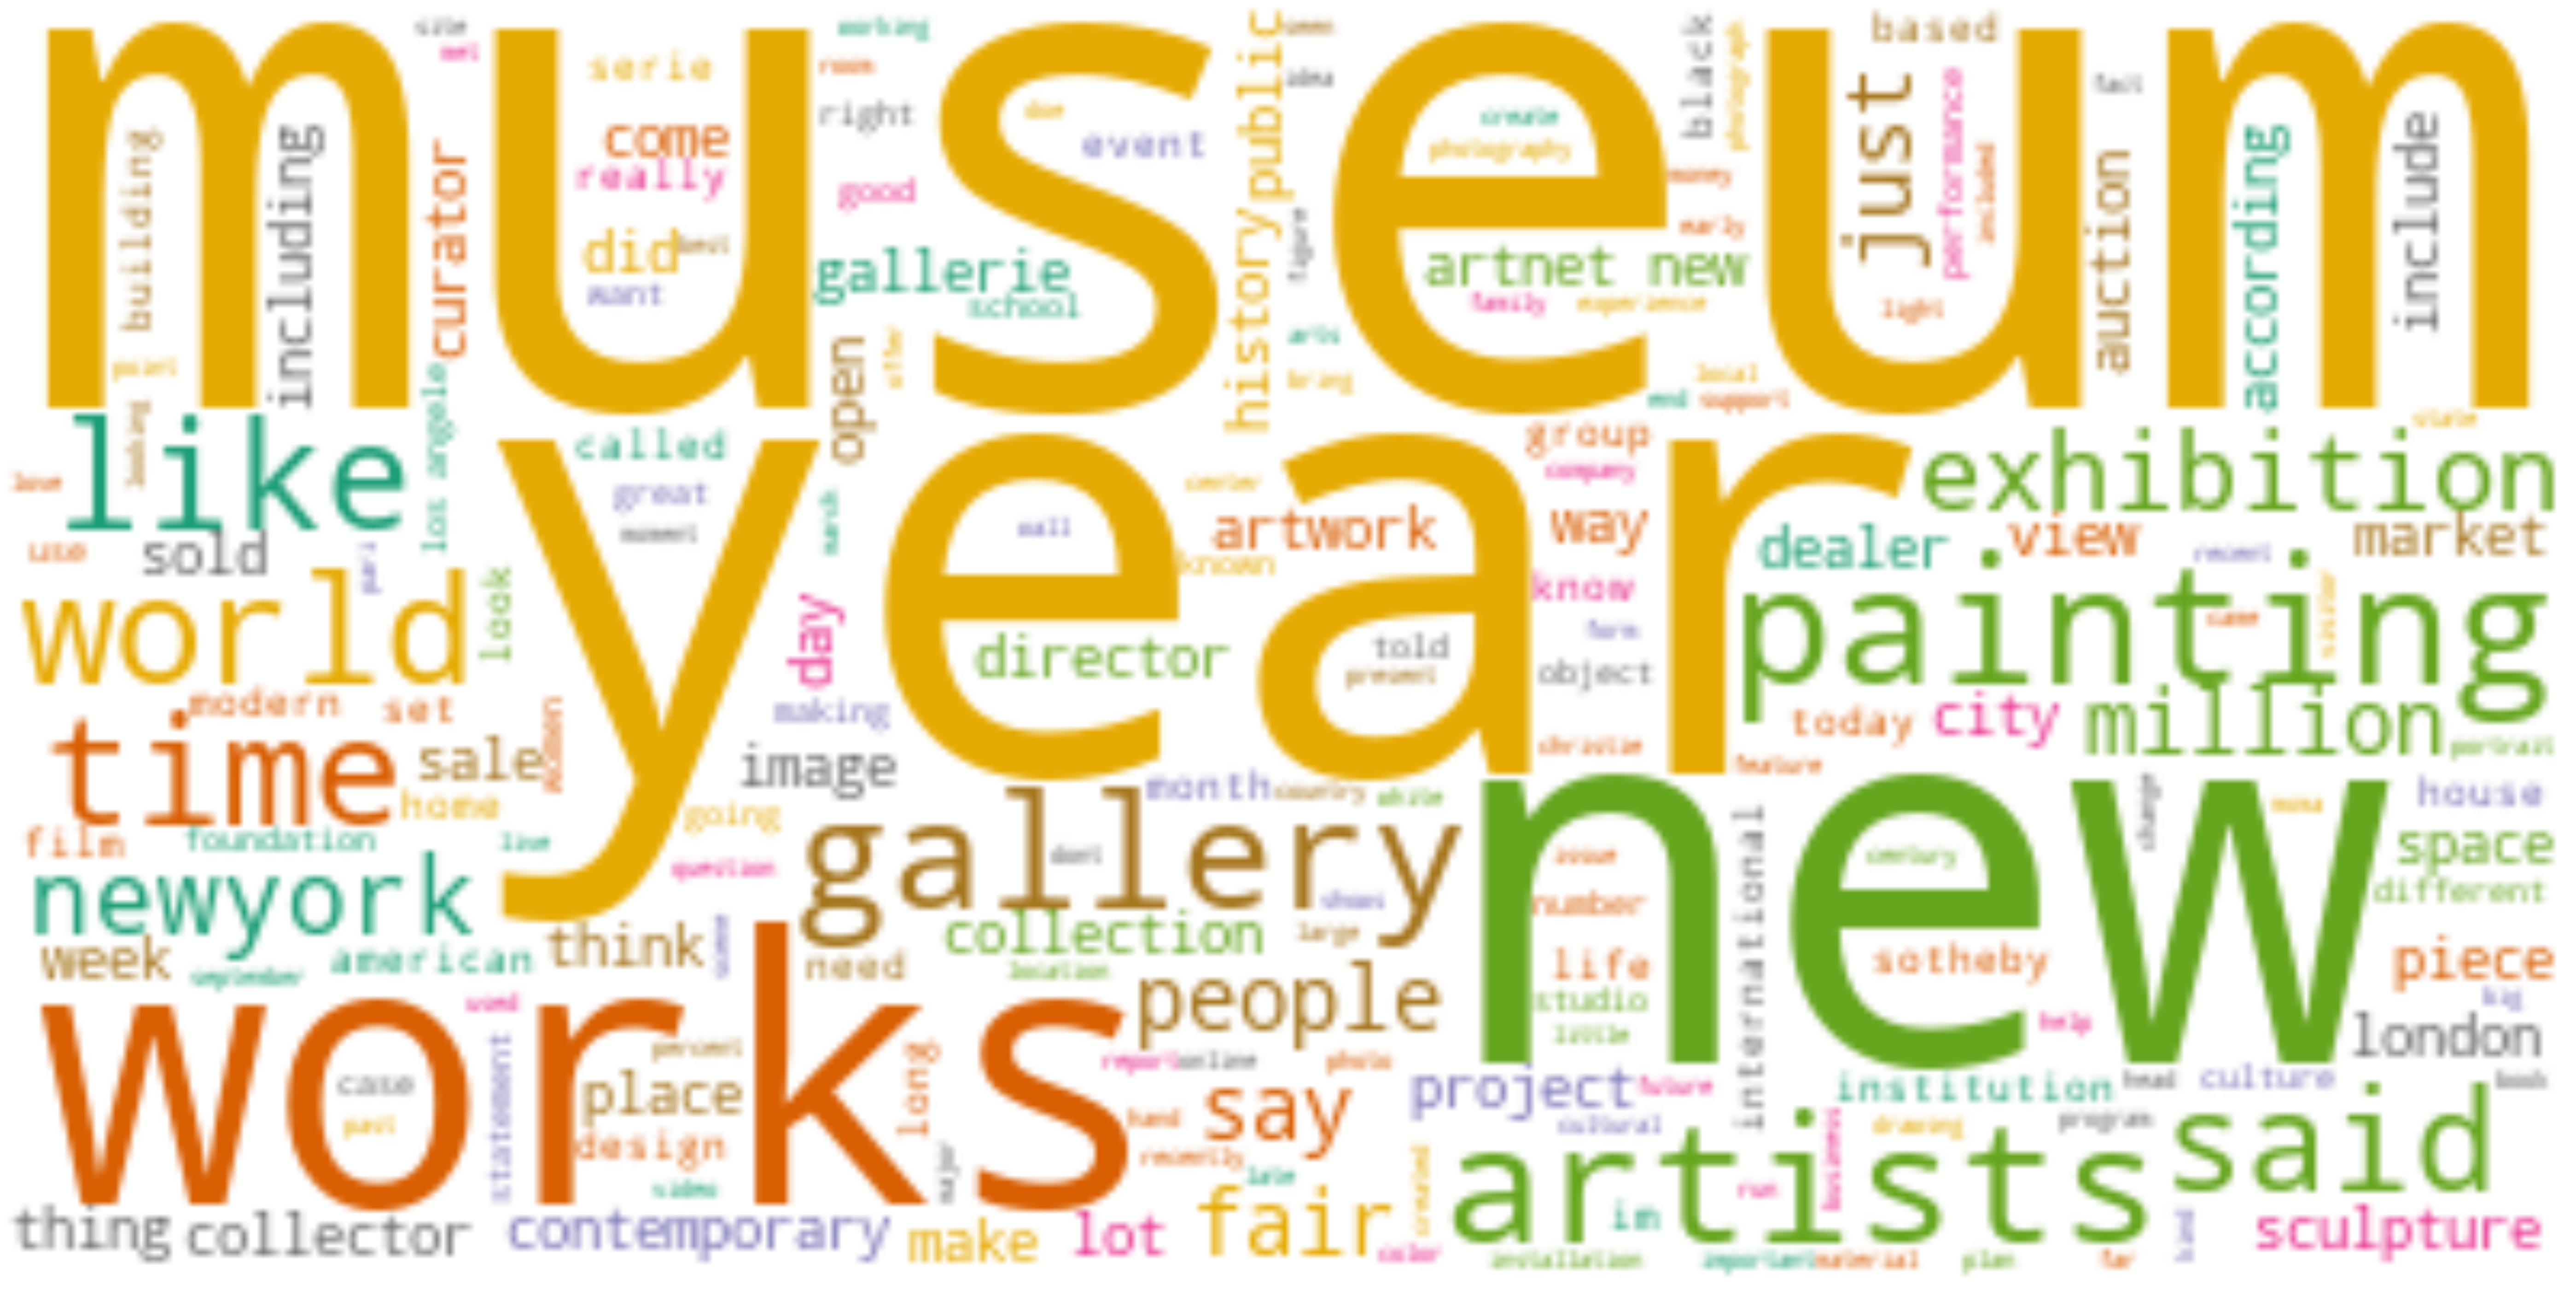

In [219]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [100, 60]

# Create subplots for each comedian
#for index, comedian in enumerate(data.columns):

wc.generate(prep)

#plt.subplot(3, 4, index+1)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
#plt.title(full_names[index])

plt.show()

In [17]:
tokens = nltk.wordpunct_tokenize(joined)
text = nltk.Text(tokens)
words = [w.lower for w in joined]

NameError: name 'joined' is not defined

In [5]:
len(tokens)

1237353

In [6]:
words_list = re.split(r'\W+', joined)
lower_words_list = []
for word in words_list:
    word = word.lower()
    watch = ["the", 'of', 'and', 'a', 'to', 'in', 's', 'that', "this", 'is', 
             'for','at', 'on', 'it', 'as', 'by', 'with', 'i', 'was', 'from', 'an', 'be', 
             'are', 'has', 'which', 'but', 'also', 'been', 'its', 'so', 
            '1', '2' , '3', '4', '5','6','7','8','9']
    if word not in watch:
        lower_words_list.append(word)
    else:
        pass


In [7]:
fdist = nltk.FreqDist(lower_words_list)

In [8]:
fdist

FreqDist({'art': 8844, 'new': 4668, 'his': 3971, 'have': 3565, 'he': 3502, 'museum': 3368, 'will': 3336, 'work': 3249, 'artist': 3098, 'we': 3019, ...})

In [17]:
len(lower_words_list)

1391652

In [9]:
for key in fdist:
     print(key + ':', fdist[key], end='; ')

art: 8844; new: 4668; his: 3971; have: 3565; he: 3502; museum: 3368; will: 3336; work: 3249; artist: 3098; we: 3019; you: 2925; who: 2701; not: 2643; gallery: 2583; artists: 2549; one: 2506; her: 2487; or: 2372; they: 2350; york: 2301; their: 2267; about: 2185; more: 2140; works: 2128; t: 2117; what: 1933; all: 1915; time: 1907; she: 1906; there: 1878; m: 1864; million: 1835; when: 1741; like: 1730; world: 1722; were: 1707; up: 1670; had: 1666; show: 1642; 000: 1594; year: 1582; can: 1569; out: 1568; first: 1526; said: 1489; exhibition: 1460; years: 1376; other: 1355; into: 1354; my: 1345; most: 1336; after: 1332; now: 1310; some: 1309; two: 1304; over: 1278; if: 1270; just: 1256; than: 1237; see: 1215; people: 1204; contemporary: 1199; painting: 1188; would: 1166; through: 1146; how: 1142; our: 1128; where: 1094; collection: 1067; these: 1049; city: 1048; news: 1042; only: 1024; last: 1018; p: 1009; do: 994; fair: 972; market: 970; us: 954; well: 947; no: 942; london: 934; director: 9

 64; sculptural: 64; rodin: 64; memory: 64; increased: 64; opportunities: 64; costs: 64; trip: 64; angle: 64; understanding: 64; renaissance: 64; breaking: 64; standard: 64; dialogue: 64; appointed: 64; mission: 63; shift: 63; theory: 63; businesses: 63; lack: 63; safe: 63; considering: 63; expanded: 63; student: 63; ready: 63; hanging: 63; reputation: 63; 1980s: 63; symbol: 63; finding: 63; edward: 63; highlight: 63; yesterday: 63; dream: 63; policy: 63; exploring: 63; singer: 63; restitution: 63; institutional: 63; experiences: 62; kept: 62; prominent: 62; seeking: 62; definitely: 62; consequential: 62; surrounding: 62; publicly: 62; theater: 62; assistant: 62; acquisitions: 62; editions: 62; tradition: 62; loan: 62; selfie: 62; enjoy: 62; temporary: 62; adam: 62; clearly: 62; wing: 62; nearby: 62; loss: 62; wearing: 62; moments: 62; character: 62; factory: 62; 75: 62; 00: 62; walker: 62; antiquities: 61; obama: 61; problems: 61; dollars: 61; protect: 61; suggests: 61; examples: 61; 

agree: 32; depictions: 32; universal: 32; danish: 32; stating: 32; michelangelo: 32; conservative: 32; mch: 32; 1995: 32; wider: 32; underground: 32; linked: 32; progressive: 32; taipei: 32; jonas: 32; faith: 32; boat: 32; craft: 32; relative: 32; baselitz: 32; 39: 32; rule: 32; careful: 32; honored: 32; shainman: 32; exploration: 31; link: 31; genre: 31; supporters: 31; adrian: 31; producer: 31; snapped: 31; confirm: 31; oliver: 31; palette: 31; reaction: 31; nobody: 31; smart: 31; proven: 31; combined: 31; kooning: 31; wool: 31; jail: 31; description: 31; temple: 31; web: 31; slide: 31; bottom: 31; slavery: 31; citing: 31; turkish: 31; elite: 31; sponsored: 31; baroque: 31; oldest: 31; besides: 31; earned: 31; intense: 31; promises: 31; restrictions: 31; successfully: 31; norman: 31; krasner: 31; biography: 31; alonso: 31; earliest: 31; reduce: 31; sorts: 31; recorded: 31; frozen: 31; schedule: 31; schneider: 31; owns: 31; dhabi: 31; participation: 31; cream: 31; perfectly: 31; refer

fuel: 19; strict: 19; parc: 19; nara: 19; notions: 19; transparent: 19; ville: 19; doctor: 19; apparent: 19; billy: 19; mohammed: 19; coins: 19; sackler: 19; ships: 19; origin: 19; medieval: 19; scholar: 19; topics: 19; combines: 19; embracing: 19; travels: 19; arrival: 19; spectacle: 19; hyper: 19; lay: 19; appearances: 19; arnold: 19; baker: 19; eclectic: 19; melbourne: 19; passionate: 19; flight: 19; stealing: 19; consignor: 19; costumes: 19; proposals: 19; orsay: 19; koolhaas: 19; involving: 19; pursue: 19; gabriel: 19; introducing: 19; ken: 19; wayne: 19; camille: 19; rubber: 19; magnate: 19; er: 19; documentation: 19; dismiss: 19; coincidence: 19; playful: 19; incorporating: 19; composed: 19; filing: 19; proper: 19; victory: 19; divine: 19; inauguration: 19; rockwell: 19; thirty: 19; counts: 19; nash: 19; skull: 19; saved: 19; outcome: 19; austen: 19; purposes: 19; banks: 19; lying: 19; horror: 19; narrow: 19; ultimate: 19; stones: 19; properly: 19; tip: 19; distributed: 19; tone

daylight: 13; dürer: 13; component: 13; throwing: 13; fate: 13; racing: 13; emperor: 13; nigerian: 13; dpa: 13; newspapers: 13; degenerate: 13; fascist: 13; genesis: 13; personnel: 13; fashioned: 13; underneath: 13; admit: 13; breadth: 13; vs: 13; 1932: 13; millennial: 13; wonders: 13; winkleman: 13; rochester: 13; joke: 13; cartier: 13; interdisciplinary: 13; attribution: 13; consensus: 13; ranged: 13; genres: 13; vervoordt: 13; tiffany: 13; assemblage: 13; adaa: 13; geography: 13; orchard: 13; lucien: 13; sol: 13; loop: 13; naming: 13; accessories: 13; resist: 13; blank: 13; demonstrates: 13; labels: 13; outlook: 13; finger: 13; reliable: 13; ideological: 13; ethical: 13; planes: 13; minimalism: 13; optical: 13; external: 13; frederick: 13; emotionally: 13; bass: 13; newport: 13; lets: 13; federation: 13; rubens: 13; tendency: 13; shed: 13; teachers: 13; grade: 13; neue: 13; bangladesh: 13; provoked: 13; encourages: 13; salzburg: 13; philosophical: 13; strangely: 13; inspires: 13; de

; tin: 10; mattress: 10; inquiries: 10; programmed: 10; transporting: 10; dire: 10; commercially: 10; static: 10; capitals: 10; ugo: 10; enigmatic: 10; gently: 10; expressing: 10; isabel: 10; millennium: 10; baume: 10; lamps: 10; imperial: 10; tatiana: 10; sealed: 10; lloyd: 10; dialogues: 10; jazz: 10; interpretations: 10; premiered: 10; uncomfortable: 10; precedent: 10; saxony: 10; hull: 10; ethnographic: 10; scan: 10; 1952: 10; 1950: 10; fierce: 10; moffett: 10; seth: 10; giorno: 10; birnbaum: 10; microsoft: 10; allan: 10; gem: 10; transaction: 10; showcased: 10; riding: 10; uncle: 10; macarthur: 10; sunny: 10; paramount: 10; bradley: 10; rosemarie: 10; dine: 10; nikki: 10; complications: 10; impressionism: 10; contributes: 10; femininity: 10; intimacy: 10; confusion: 10; mennour: 10; avatar: 10; surgery: 10; belly: 10; delicious: 10; cabbage: 10; gentile: 10; denies: 10; donovan: 10; skowhegan: 10; medal: 10; melissa: 10; prisons: 10; margins: 10; definitive: 10; unity: 10; recount

 8; dimensions: 8; sciences: 8; coherent: 8; throws: 8; kiss: 8; guernica: 8; simulation: 8; northwestern: 8; limiting: 8; arsenal: 8; 11a: 8; lynette: 8; afro: 8; bove: 8; prepares: 8; amalia: 8; quo: 8; heyday: 8; ferguson: 8; hollowell: 8; jasmine: 8; adorn: 8; chart: 8; lissoni: 8; vacant: 8; mcdonald: 8; charcoal: 8; consumerism: 8; pencils: 8; blending: 8; infinite: 8; bending: 8; assisted: 8; freeports: 8; owes: 8; fog: 8; landesman: 8; fundraiser: 8; kosuth: 8; errazuriz: 8; negro: 8; tracing: 8; coachella: 8; kingston: 8; africans: 8; alter: 8; bazaar: 8; rises: 8; tier: 8; fifty: 8; mesler: 8; wheel: 8; chateau: 8; starred: 8; comprising: 8; circulating: 8; lure: 8; creditors: 8; aitken: 8; formation: 8; beats: 8; sentimental: 8; deficit: 8; adventures: 8; newcomers: 8; funeral: 8; gotta: 8; modes: 8; cheek: 8; vilma: 8; constitution: 8; beliefs: 8; 325: 8; edmund: 8; indonesian: 8; congo: 8; mutually: 8; futurism: 8; armed: 8; governance: 8; neutral: 8; lightly: 8; oddly: 8;

contended: 6; carving: 6; idiosyncratic: 6; parsons: 6; mate: 6; flavor: 6; utilize: 6; schedules: 6; flipping: 6; liza: 6; reliant: 6; imbalance: 6; singers: 6; lopez: 6; rebuild: 6; fruitful: 6; disastrous: 6; sensational: 6; bundeskunsthalle: 6; dealership: 6; populate: 6; coded: 6; chile: 6; tribal: 6; mischief: 6; committees: 6; vet: 6; connoisseurship: 6; disclosed: 6; pedigree: 6; zones: 6; thematically: 6; lawson: 6; delve: 6; preparation: 6; ramallah: 6; khaled: 6; gaza: 6; blows: 6; olives: 6; hypnotic: 6; pours: 6; tray: 6; clues: 6; blurry: 6; polar: 6; quasi: 6; cohesive: 6; multicolored: 6; ethereal: 6; ceramicist: 6; pale: 6; peninsula: 6; gedi: 6; airy: 6; numbered: 6; museumofmodernart: 6; skepticism: 6; negotiated: 6; prisoners: 6; globalized: 6; dissolution: 6; segal: 6; matriarch: 6; dresses: 6; alicja: 6; trouvé: 6; extradition: 6; passport: 6; feds: 6; stateside: 6; 950: 6; earnest: 6; aficionados: 6; wagstaff: 6; entries: 6; milestone: 6; wears: 6; corrupt: 6; ca

5; goss: 5; flanked: 5; wasteland: 5; weaving: 5; corners: 5; engages: 5; backyard: 5; headlined: 5; forceful: 5; accepts: 5; outcomes: 5; habitat: 5; undermined: 5; nbc: 5; frustrating: 5; freelancers: 5; spectator: 5; bucket: 5; fabricant: 5; appraise: 5; mentioning: 5; stressful: 5; congratulations: 5; starchitect: 5; flawless: 5; loser: 5; palermo: 5; streak: 5; ferrari: 5; stunned: 5; coastal: 5; hails: 5; horrifying: 5; shameful: 5; lynchings: 5; morbid: 5; taliban: 5; segregation: 5; amnesia: 5; endorsement: 5; commemorated: 5; responsive: 5; discerning: 5; memento: 5; douglass: 5; reject: 5; coating: 5; communism: 5; intervene: 5; outdated: 5; rethinking: 5; determines: 5; sited: 5; consultation: 5; charleston: 5; unacceptable: 5; civilized: 5; unified: 5; bullets: 5; brito: 5; cern: 5; particle: 5; collider: 5; arctic: 5; sushi: 5; phelps: 5; picassos: 5; networking: 5; stereo: 5; stoschek: 5; nächst: 5; lookout: 5; raids: 5; pis: 5; implementing: 5; regulate: 5; prohibited: 5

 4; mines: 4; mediated: 4; artistically: 4; kissed: 4; maar: 4; angola: 4; resolutely: 4; counterbalance: 4; redirected: 4; gloria: 4; summers: 4; dispersed: 4; metaphorically: 4; marconi: 4; tides: 4; bergamo: 4; darkest: 4; secrecy: 4; dix: 4; arises: 4; zimmer: 4; restitute: 4; perpetrated: 4; dealt: 4; expeditions: 4; clocks: 4; correction: 4; likens: 4; pitfalls: 4; beware: 4; adhere: 4; akris: 4; cashmere: 4; sweaters: 4; hugging: 4; coats: 4; skyscrapers: 4; riffed: 4; mallet: 4; delaunay: 4; 1924: 4; tunic: 4; dorm: 4; tightening: 4; easiest: 4; commanded: 4; logistical: 4; tinged: 4; mohammad: 4; riveting: 4; camerawork: 4; migrations: 4; coverings: 4; taaffe: 4; rona: 4; photoshopped: 4; avian: 4; unforgettable: 4; audacious: 4; brad: 4; dissolve: 4; patches: 4; deprez: 4; embellished: 4; lettering: 4; obliterated: 4; impassioned: 4; whistle: 4; renee: 4; momafaircontract: 4; feathery: 4; perplexing: 4; behave: 4; confusing: 4; govern: 4; revolves: 4; 327: 4; 227: 4; moderato

; safer: 4; intrepid: 4; persons: 4; abstraktes: 4; minnesota: 4; analogy: 4; iphones: 4; juergen: 4; frightening: 4; humankind: 4; cloisters: 4; stereotypes: 4; environs: 4; comte: 4; purifoy: 4; whitley: 4; metallic: 4; faint: 4; stains: 4; superman: 4; wrongfully: 4; brushstroke: 4; felipe: 4; letizia: 4; terre: 4; multiculturalism: 4; mysteriously: 4; insurer: 4; metke: 4; visuals: 4; ridley: 4; beams: 4; conspicuously: 4; pinhole: 4; undeniable: 4; sands: 4; unsurprising: 4; propel: 4; compiling: 4; icy: 4; cubes: 4; silenced: 4; electrozavod: 4; asya: 4; kuzkin: 4; 1895: 4; vignettes: 4; chinatown: 4; impulsively: 4; downward: 4; cavalier: 4; albu: 4; erase: 4; perfume: 4; unsolicited: 4; provision: 4; authenticating: 4; clarification: 4; negligent: 4; reversal: 4; docs: 4; nrw: 4; uninterrupted: 4; 1884: 4; wrist: 4; buckle: 4; speeding: 4; objectives: 4; undergoing: 4; tri: 4; wendell: 4; squeezed: 4; readership: 4; bowers: 4; leisure: 4; benches: 4; hi: 4; postal: 4; sperone: 

; upped: 3; learns: 3; translations: 3; pskov: 3; tenured: 3; mosque: 3; thrives: 3; preserves: 3; allocate: 3; roommate: 3; progressed: 3; hasselblad: 3; summertime: 3; camping: 3; flipped: 3; discriminatory: 3; disrupting: 3; undermining: 3; contextualize: 3; basels: 3; gravitating: 3; praying: 3; lombardy: 3; standstill: 3; refuses: 3; fumagalli: 3; gió: 3; bounce: 3; exempt: 3; auf: 3; symbolizing: 3; validity: 3; 735: 3; montagne: 3; victoire: 3; contaminated: 3; claimants: 3; rehabilitated: 3; wholly: 3; perished: 3; unambiguous: 3; 1869: 3; consuelo: 3; incorrect: 3; eliminating: 3; restorations: 3; cunning: 3; verify: 3; modernes: 3; trapezoid: 3; overshadow: 3; graduating: 3; 505: 3; rotten: 3; clamps: 3; sunken: 3; interruption: 3; frederik: 3; asma: 3; ghanem: 3; bashar: 3; hourani: 3; brutality: 3; nonstop: 3; britney: 3; caps: 3; narcissism: 3; spaced: 3; fluffy: 3; phong: 3; outlandish: 3; elicit: 3; uncommon: 3; pearson: 3; ledray: 3; sumptuous: 3; congregating: 3; preda

; eccles: 3; muddied: 3; fundraisers: 3; nottingham: 3; toddlers: 3; tuesdays: 3; thursdays: 3; alcove: 3; hepburn: 3; inducing: 3; callahan: 3; receiver: 3; signatory: 3; flam: 3; wrongdoing: 3; llp: 3; unintended: 3; elephantiasis: 3; ecologically: 3; implicit: 3; computing: 3; grin: 3; sucks: 3; shouting: 3; discourage: 3; tagline: 3; wnyc: 3; decolonize: 3; petals: 3; 905: 3; fraenkel: 3; digitization: 3; pendulum: 3; moods: 3; ripples: 3; bleeding: 3; terminology: 3; trustworthy: 3; algerian: 3; teeuwen: 3; bruning: 3; abeles: 3; pearls: 3; alas: 3; corpse: 3; africobra: 3; silvery: 3; cartoonish: 3; barrel: 3; outings: 3; wahle: 3; felixmüller: 3; hcpo: 3; guttman: 3; crude: 3; severing: 3; reigning: 3; candlelight: 3; distractions: 3; calmly: 3; 1660: 3; 1626: 3; 1664: 3; crosses: 3; flows: 3; bounces: 3; holographic: 3; pitcher: 3; doc: 3; emmy: 3; yearlong: 3; ctv: 3; unload: 3; freehand: 3; modus: 3; mercanti: 3; permissible: 3; ropes: 3; greenberger: 3; frantic: 3; grander: 

impervious: 2; pardon: 2; embezzling: 2; recoiled: 2; interconnectedness: 2; inescapable: 2; evaporated: 2; drying: 2; dwell: 2; slang: 2; wholeheartedly: 2; insecure: 2; neurotic: 2; squeegee: 2; foisting: 2; onerous: 2; homeowners: 2; covets: 2; bolt: 2; annoyance: 2; wayward: 2; kindly: 2; careening: 2; nah: 2; tang: 2; councillor: 2; ideologically: 2; goethe: 2; deport: 2; lutyens: 2; mughal: 2; fanaticism: 2; hcp: 2; haste: 2; narayan: 2; fleury: 2; champs: 2; conforming: 2; flax: 2; kossenjans: 2; jankossen: 2; jeong: 2; fondly: 2; hobbies: 2; nerves: 2; skilfully: 2; meshing: 2; instagrammed: 2; repurposing: 2; miserable: 2; favourite: 2; lise: 2; regimented: 2; disks: 2; cassette: 2; vending: 2; nosebleed: 2; loïc: 2; freshness: 2; toasted: 2; elbaz: 2; distasteful: 2; resurgent: 2; sectarian: 2; digitizing: 2; seminar: 2; bulgaria: 2; hélio: 2; oiticica: 2; distinguishing: 2; socializing: 2; buehner: 2; pixelated: 2; carvings: 2; farmers: 2; aly: 2; partying: 2; misanthropic: 

binder: 2; linseed: 2; hue: 2; exportation: 2; jian: 2; offenses: 2; cataloging: 2; 920: 2; safeguard: 2; lamensdorf: 2; benavente: 2; azikiwe: 2; deflating: 2; abrons: 2; underpaid: 2; booty: 2; ritzy: 2; spiegelbilder: 2; catalogs: 2; manuals: 2; zoology: 2; 63rd: 2; 021: 2; sibler: 2; bavaria: 2; assert: 2; bicocca: 2; achim: 2; bice: 2; machinery: 2; ader: 2; endorsed: 2; extract: 2; squid: 2; bugs: 2; plights: 2; cruelty: 2; blick: 2; castell: 2; crayons: 2; secreted: 2; lac: 2; swears: 2; cosmetic: 2; veganism: 2; restaged: 2; pva: 2; gamblin: 2; lobster: 2; symbiotic: 2; kharkiv: 2; volovik: 2; idly: 2; attackers: 2; sociologist: 2; insanely: 2; phalli: 2; debuting: 2; adjectives: 2; insignificance: 2; heartbeats: 2; refresh: 2; edmond: 2; humanoid: 2; dietary: 2; solves: 2; cryptocurrencies: 2; bitcoin: 2; artory: 2; codex: 2; meyohas: 2; chiefly: 2; speculating: 2; distaste: 2; scented: 2; abducted: 2; olson: 2; droitcour: 2; subhash: 2; buscemi: 2; bested: 2; memorably: 2; ro

 2; beholden: 2; bosses: 2; hindsight: 2; onus: 2; vampires: 2; roam: 2; lactation: 2; broom: 2; hygienic: 2; breastfeeding: 2; forbid: 2; caregivers: 2; discriminated: 2; caregiver: 2; visualizations: 2; disability: 2; boulder: 2; yosemite: 2; mets: 2; unarmed: 2; deviantart: 2; registrations: 2; engines: 2; deliberation: 2; icann: 2; approximation: 2; arttactic: 2; manipulating: 2; actuality: 2; nrc: 2; profiteering: 2; ethically: 2; beneficial: 2; supplemental: 2; thorne: 2; juries: 2; raunchy: 2; dudley: 2; astaire: 2; lilly: 2; atrocities: 2; wrongs: 2; bea: 2; muddling: 2; rebuttal: 2; trumped: 2; pomp: 2; uovo: 2; rested: 2; sweeney: 2; cashman: 2; murado: 2; desks: 2; fogg: 2; elephants: 2; spectators: 2; neutrality: 2; lettre: 2; nemo: 2; valéry: 2; innovations: 2; chilly: 2; horace: 2; compact: 2; turtleneck: 2; crisply: 2; swiping: 2; molecular: 2; operatic: 2; inventories: 2; harassing: 2; transgender: 2; plaudits: 2; ignition: 2; inauspicious: 2; rainstorms: 2; onsite: 2; 

 2; insinuates: 2; bolton: 2; freddy: 2; myriad: 2; trayvon: 2; spiked: 2; 1900s: 2; diallo: 2; manifold: 2; salisbury: 2; tetrahedral: 2; tetrahedron: 2; swimsuit: 2; fundraise: 2; headset: 2; voyager: 2; morán: 2; fisk: 2; levai: 2; 5womenartists: 2; evelyne: 2; kulczyk: 2; projector: 2; mince: 2; kold: 2; dialectic: 2; eastcastle: 2; walkabout: 2; miyako: 2; yoshinaga: 2; spliced: 2; hoses: 2; irrigation: 2; harbingers: 2; hodgson: 2; watchtower: 2; boomboxes: 2; fillings: 2; brickolage: 2; lint: 2; oo: 2; steinunn: 2; foundry: 2; interlocking: 2; shuffling: 2; aspire: 2; traverse: 2; larrabee: 2; isek: 2; heal: 2; scalloped: 2; welding: 2; reversing: 2; authenticité: 2; schemes: 2; inwards: 2; multistory: 2; holiness: 2; viii: 2; stride: 2; gorgeously: 2; dolphins: 2; delphine: 2; versteeg: 2; justly: 2; stuy: 2; nycityworld: 2; reade: 2; heath: 2; mac: 2; fries: 2; harking: 2; mitt: 2; cabal: 2; fork: 2; calves: 2; grable: 2; overcoming: 2; transfusion: 2; mj: 2; sanity: 2; lender

tiaras: 2; homm: 2; tarkins: 2; mulberry: 2; horton: 2; yamazaki: 2; phonetic: 2; graphical: 2; sutra: 2; gardelphe: 2; bergantinos: 2; attested: 2; addy: 2; speculators: 2; macaal: 2; lazraq: 2; frozenpants: 2; sava: 2; kudrna: 2; santero: 2; corazon: 2; moonwalk: 1; mead: 1; gushed: 1; servicemen: 1; nuns: 1; steffanie: 1; rosalez: 1; goncalves: 1; pompano: 1; bêtes: 1; milford: 1; lamson: 1; sweeper: 1; maarten: 1; baas: 1; brabant: 1; souther: 1; mishawaka: 1; pettit: 1; durango: 1; gooder: 1; tine: 1; cinder: 1; geologic: 1; 1150: 1; incidences: 1; mathias: 1; rastorfer: 1; cheadle: 1; madcap: 1; vocativ: 1; wallflower: 1; hasselhoff: 1; winded: 1; babylonia: 1; pretenses: 1; delval: 1; nawi: 1; alaoui: 1; campo: 1; foundling: 1; bergmann: 1; whitewashes: 1; kozlow: 1; srosekoz: 1; chambaz: 1; shuffled: 1; tranquility: 1; splayed: 1; hilly: 1; sta: 1; ël: 1; domaine: 1; accentuated: 1; finishes: 1; dubourg: 1; magnify: 1; stroke: 1; fc1: 1; humiliated: 1; mondo: 1; swallowtail: 1;

kochs: 1; sacklers: 1; norma: 1; salacious: 1; autoconstrucción: 1; afronova: 1; côte: 1; ivoire: 1; lapcek: 1; artplace: 1; mummified: 1; bathrobe: 1; morgothlot: 1; hopefuls: 1; bloated: 1; unshaven: 1; academyawards: 1; sexassault: 1; harrasment: 1; oscars2018: 1; lizbeth: 1; cuadras: 1; ossko: 1; higdon: 1; albinder: 1; matty: 1; enchev: 1; jesushands: 1; padhia: 1; simplysaraart: 1; missmichellefit: 1; savage_boy_lol_18: 1; pverik: 1; trankina: 1; kuby: 1; tyrannies: 1; dishonor: 1; laud: 1; magnifying: 1; lo: 1; bagged: 1; unscathed: 1; rector: 1; langkilde: 1; pretext: 1; 1766: 1; marete: 1; jankowski: 1; overgaden: 1; takedowns: 1; symbolized: 1; kitti: 1; holmfeldt: 1; mwazulu: 1; payscale: 1; incomes: 1; geta: 1; bratescu: 1; autodidact: 1; ianonne: 1; collegiate: 1; exposures: 1; scriptural: 1; predestination: 1; teleological: 1; girlish: 1; epistolary: 1; testes: 1; vulvae: 1; marvelous: 1; prudishness: 1; blare: 1; warbling: 1; genuineness: 1; repose: 1; professionalized: 

; liters: 1; blades: 1; lateral: 1; pranks: 1; epilogue: 1; rehearsals: 1; subtitle: 1; amenable: 1; aug: 1; lkzltzdnan: 1; comptonverney: 1; euergides: 1; ovlqyxl1qv: 1; catharina: 1; hemessen: 1; 37v9hrycva: 1; reminisces: 1; briton: 1; riviere: 1; royalholloway: 1; qkfbxsfmgd: 1; mazrust: 1; zhanji: 1; xuande: 1; 1426: 1; 1435: 1; salukis: 1; 1427: 1; ming50years: 1; kajx4nxq1s: 1; clunas: 1; 柯律格: 1; craigclunas: 1; illuminators: 1; furry: 1; analogues: 1; tcd: 1; f24r: 1; 165v: 1; researchcolls: 1; nzwzqtuaie: 1; peritia: 1; peritiaeditors: 1; k6: 1; yrs: 1; 2qginsndlz: 1; bt: 1; btarchives: 1; oxley: 1; 12mn6pq1nh: 1; wimbledon: 1; ual: 1; wimbledonual: 1; salviati: 1; 1533: 1; wicnw49bwu: 1; zs7cotd5s1: 1; cath_fletcher: 1; harbors: 1; snoozing: 1; tju7bza5nv: 1; ejbrand: 1; lr2bnxdsnr: 1; fx4lyevx5y: 1; aw: 1; landseer: 1; dwbqmbjtyj: 1; eal2jd8jjz: 1; chatsworth: 1; chatsworthhouse: 1; bm_ag: 1; ba7xozwy63: 1; bmag: 1; bmagcurators: 1; qizong: 1; lthcvn9wyu: 1; tlgbk5zau9: 1; w

 1; convex: 1; tibor: 1; njami: 1; bonaventure: 1; soh: 1; bejeng: 1; ndikung: 1; alya: 1; sebti: 1; cathcart: 1; huldisch: 1; jamin: 1; stirs: 1; 1194: 1; 1225: 1; desecration: 1; longhauser: 1; prepped: 1; stews: 1; braises: 1; batches: 1; carrots: 1; pinto: 1; husks: 1; quartered: 1; jalapeño: 1; poblano: 1; gingerly: 1; scalding: 1; drizzle: 1; kosher: 1; dollops: 1; lime: 1; airplanes: 1; semiotics: 1; rowhouse: 1; shopper: 1; fixings: 1; noodles: 1; pantry: 1; scaring: 1; handfuls: 1; seedless: 1; skillet: 1; yardy: 1; overstocking: 1; marinade: 1; ⅛: 1; dusting: 1; lengthwise: 1; wedges: 1; blacken: 1; dollop: 1; copake: 1; sherwood: 1; cupboards: 1; amass: 1; rosewater: 1; tamarind: 1; buckwheat: 1; chickpeas: 1; survivalist: 1; ulaan: 1; bataar: 1; herders: 1; tuguldur: 1; yondonjamts: 1; buuz: 1; lb: 1; ulaanbaatar: 1; tortillas: 1; gyoza: 1; basket: 1; rooster: 1; breakfasts: 1; dijon: 1; sherry: 1; whisking: 1; emulsify: 1; jenniferrubell: 1; plating: 1; airtight: 1; mins: 

 1; trystero: 1; novella: 1; blubber: 1; baggy: 1; thwarts: 1; otavio: 1; pandolfo: 1; entertain: 1; interludes: 1; nonchalantly: 1; sunburst: 1; cannon: 1; okui: 1; patinated: 1; anthropoid: 1; smallish: 1; overhung: 1; princenthal: 1; midair: 1; predominate: 1; jumper: 1; zeus: 1; tapioca: 1; orifices: 1; reunites: 1; transexualis: 1; innuendo: 1; perineum: 1; enmeshed: 1; graceful: 1; sheeting: 1; sawed: 1; bookcase: 1; teardrops: 1; jb: 1; sinuously: 1; vegetal: 1; muscularity: 1; westfall: 1; blocky: 1; waynetopia: 1; overlain: 1; revolting: 1; travesty: 1; abrasive: 1; draftsmanship: 1; bricoleur: 1; chevron: 1; eyal: 1; munitions: 1; architecure: 1; mdc: 1; landres: 1; whistleblowers: 1; confessed: 1; idf: 1; photogrammetry: 1; verifying: 1; sensationalize: 1; lacunae: 1; toolbox: 1; businesswoman: 1; eldest: 1; strenuously: 1; siphoned: 1; vendetta: 1; icij: 1; evaluates: 1; bullfight: 1; 495: 1; sonje: 1; aldermaston: 1; caiger: 1; lustre: 1; designating: 1; boosts: 1; berserk

keychains: 1; gateways: 1; ravishing: 1; commandeered: 1; fraternal: 1; defamation: 1; counterclaims: 1; dampened: 1; w1f: 1; 7ps: 1; 8pm: 1; grams: 1; milligrams: 1; breezes: 1; w1f7ps: 1; narrowing: 1; artsiest: 1; moderates: 1; sheffer: 1; brent: 1; riggio: 1; mitrani: 1; steyer: 1; och: 1; mccrary: 1; zackary: 1; gillibrand: 1; julián: 1; inslee: 1; hickenlooper: 1; bullock: 1; 005: 1; bennet: 1; bylines: 1; mediabistro: 1; fishbowlny: 1; spanbroek: 1; n2lqaayyoo: 1; musicienne: 1; blond: 1; videoclip: 1; b9lpp42akb: 1; gallagher: 1; saini: 1; raqib: 1; frize: 1; dampen: 1; mirzapour: 1; farr: 1; weavers: 1; bhutan: 1; laos: 1; artwise: 1; germ: 1; latinos: 1; voto: 1; vota: 1; perturbing: 1; discomfitin: 1; propositional: 1; dreaminess: 1; facetimes: 1; workneh: 1; freaking: 1; grieve: 1; tellers: 1; landback: 1; ficre: 1; ghebreyesus: 1; sabbatino: 1; shoutout: 1; tennyson: 1; abides: 1; temper: 1; inclusivity: 1; cheering: 1; sociopaths: 1; divisiveness: 1; safeguarded: 1; unfan

1; montevideo: 1; gabo: 1; charitably: 1; firebrands: 1; abdalla: 1; succinctly: 1; unscientific: 1; jowl: 1; intolerable: 1; hoardings: 1; doyenne: 1; skibum: 1; winant: 1; dannielle: 1; alekhougie: 1; safdie: 1; blazers: 1; ramsey: 1; hapless: 1; viktoria: 1; binschtok: 1; headscarves: 1; pips: 1; barclay: 1; mannis: 1; rifle: 1; bewildering: 1; sculptress: 1; liliane: 1; chauvanism: 1; coalfield: 1; rosanne: 1; robertson: 1; butch: 1; clough: 1; halifax: 1; jute: 1; bestrode: 1; plumes: 1; vapor: 1; projeckte: 1; correcting: 1; overcast: 1; relented: 1; cubis: 1; xix: 1; supersized: 1; ageless: 1; conceptualize: 1; barebones: 1; storylines: 1; unfriendly: 1; unwashed: 1; crackers: 1; briskly: 1; gaine: 1; acephalous: 1; overgaard: 1; klagt: 1; gegen: 1; swantje_karich: 1; berichtet: 1; undiscerningly: 1; circumvents: 1; gallerytalk: 1; gallerytalknet: 1; repertory: 1; potentiality: 1; fascistic: 1; incendiary: 1; thrilling: 1; lifelike: 1; colonizing: 1; inclusions: 1; scalia: 1; do

 1; modernartancientwages: 1; uaw: 1; deductibles: 1; hospitalization: 1; salespersons: 1; accountants: 1; srihatta: 1; bella: 1; bassett: 1; honchos: 1; 6062: 1; odermatt: 1; croquer: 1; zwack: 1; vodou: 1; piplotti: 1; printers: 1; proofs: 1; erdman: 1; oberlin: 1; octavia: 1; bürgel: 1; sagredo: 1; lorenza: 1; fulvio: 1; zanon: 1; ufficine: 1; zattere: 1; tecmolde: 1; luzan: 1; grupoo: 1; orseolo: 1; srl: 1; gondolieri: 1; representanted: 1; udi: 1; sheleg: 1; shani: 1; biennale2017venezia: 1; biennale2017: 1; lorenzoquinn: 1; supportart: 1; climatechange: 1; accelerating: 1; 025: 1; multiflavors: 1; treading: 1; whispering: 1; tonnicode: 1; 825: 1; ignominy: 1; 788: 1; tussle: 1; 791: 1; moraes: 1; gluck: 1; foreheads: 1; raiser: 1; barbaric: 1; 7million: 1; incendie: 1; 911: 1; burkhardt: 1; graffenreid: 1; gong: 1; illuminazioni: 1; rokni: 1; haerizadeh: 1; wael: 1; shawky: 1; bilingual: 1; redefining: 1; ghitis: 1; zalcman: 1; mayes: 1; synthesizers: 1; burners: 1; lohan: 1; war

 1; steves: 1; backside: 1; gyrates: 1; coped: 1; commercials: 1; liberated: 1; centeredness: 1; bustle: 1; indescribable: 1; crams: 1; tham: 1; luang: 1; overpowering: 1; collapsing: 1; wollstonecraft: 1; herbe: 1; noires: 1; confidant: 1; schlepping: 1; transwoman: 1; wonderground: 1; hungered: 1; fudges: 1; breathy: 1; voiceover: 1; millie: 1; anthological: 1; scabrous: 1; recharging: 1; everydayness: 1; disimages: 1; boyle: 1; roso: 1; sundry: 1; glazek: 1; kalle: 1; lasn: 1; twirling: 1; teargas: 1; reawakening: 1; damon: 1; zoomed: 1; individuality: 1; dehumanization: 1; frito: 1; muck: 1; abakanowicz: 1; outrank: 1; bloomer: 1; corde: 1; sensib: 1; cassis: 1; 1872: 1; 468: 1; 010: 1; juwelier: 1; desist: 1; backflipping: 1; glucklawfirm: 1; _revok_: 1; abomey: 1; godonou: 1; beninese: 1; visor: 1; earthrise: 1; shanzhuan: 1; bolzano: 1; denominational: 1; makiki: 1; wishin: 1; honolulumuseumofart: 1; honolulumuseumofartspaldinghouse: 1; headdress: 1; chested: 1; earle: 1; 3hgiwe

 1; rit: 1; resisted: 1; waived: 1; unrealistically: 1; petitioners: 1; repurchase: 1; foregoing: 1; adduced: 1; ratable: 1; fmv: 1; determinations: 1; taxable: 1; marketability: 1; restraints: 1; hornaday: 1; aff: 1; 445: 1; mara: 1; elad: 1; lassry: 1; ackroyd: 1; betts: 1; averard: 1; researches: 1; felicity: 1; transparently: 1; outsource: 1; contast: 1; indexes: 1; numerals: 1; fluctuates: 1; intrusive: 1; spraypaint: 1; unibrow: 1; eloesser: 1; apron: 1; uncollared: 1; dungarees: 1; epoque: 1; bleue: 1; paraphrasing: 1; gunningham: 1; stenciling: 1; guetta: 1; concede: 1; theorizing: 1; unpolished: 1; ideologues: 1; chopping: 1; devito: 1; cho: 1; sebadoh: 1; jello: 1; biafra: 1; tweedy: 1; wilco: 1; chauffeur: 1; adaptations: 1; chenal: 1; gleiberman: 1; moodiness: 1; nativeson: 1; blauvelt: 1; ctblauvelt: 1; whistleblower: 1; onfirmed: 1; grimes: 1; fairview: 1; gloucestershire: 1; dazzlingly: 1; conceals: 1; tm13: 1; busies: 1; blackboard: 1; tempering: 1; branczik: 1; gigacol

grievance: 1; skyrockets: 1; inflate: 1; inference: 1; law360: 1; cavanaugh: 1; belknap: 1; icehouse: 1; bleary: 1; sweetly: 1; giggled: 1; limp: 1; jockey: 1; hairless: 1; drowsily: 1; amphetamines: 1; snuggling: 1; tottering: 1; rattling: 1; algernon: 1; entailed: 1; socket: 1; rotting: 1; hayworth: 1; farrar: 1; giroux: 1; warily: 1; hierophant: 1; majorly: 1; ueen: 1; temperance: 1; cornelis: 1; arthemisia: 1; woodcuts: 1; jessurun: 1; babel: 1; vertiginous: 1; proverbs: 1; emblematica: 1; resonant: 1; preoccupations: 1; throughline: 1; tesselation: 1; liberally: 1; replays: 1; geometries: 1; alhambra: 1; skirmish: 1; perish: 1; butchered: 1; symmetrically: 1; bends: 1; hippies: 1; ardent: 1; fab: 1; mantis: 1; alit: 1; sarcophagus: 1; amusingly: 1; reptiles: 1; gleefully: 1; bruegel: 1; cleverness: 1; creepiness: 1; flatworms: 1; googly: 1; slithering: 1; wentelteefje: 1; parading: 1; sueño: 1; razón: 1; monstruos: 1; 1799: 1; swarmed: 1; owls: 1; emotionless: 1; insistently: 1; i

; robotart: 1; mariaspectorart: 1; skewers: 1; ruben: 1; majeure: 1; nogent: 1; izïa: 1; higelin: 1; lindon: 1; séverine: 1; canelle: 1; rusticated: 1; irrefutable: 1; hoovers: 1; trawl: 1; stendhal: 1; kali: 1; jarecki: 1; errázuriz: 1; nomads: 1; kawésqar: 1; jamasee: 1; pitseolak: 1; blondet: 1; dispossession: 1; foreigner: 1; contented: 1; invaders: 1; perón: 1; wristwatch: 1; pronouncements: 1; pantomime: 1; bonadies: 1; olavarria: 1; highrise: 1; slum: 1; hortatory: 1; fulminations: 1; weaker: 1; staunchly: 1; insulated: 1; inexorably: 1; wrench: 1; sameyness: 1; stables: 1; satisfyingly: 1; alternatively: 1; yuxweluptun: 1; thematize: 1; hemisphere: 1; talwst: 1; redound: 1; miniaturized: 1; productively: 1; particularized: 1; alcalde: 1; revenge: 1; captives: 1; extremity: 1; uneasily: 1; polarities: 1; isomorphic: 1; behooves: 1; scorching: 1; horseman: 1; colonialist: 1; relativizing: 1; diffusing: 1; dispose: 1; satisfactory: 1; trough: 1; 784: 1; 477: 1; 887: 1; 472: 1; vin

In [10]:
longest = ''
for word in lower_words_list:
    if len(word) > len(longest):
        longest = word

In [11]:
longest

'僕がblmムーブメントにインスピレーションを受けて制作した版画6種のうち1種を購入するチャンスを獲得する抽選会に登録して下さい'

In [12]:
def permutations(seq):
    if len(seq) <= 1:
         yield seq
    else:
        for perm in permutations(seq[1:]):
            for i in range(len(perm)+1):
                yield perm[:i] + seq[0:1] + perm[i:]

In [136]:
"""#indic.append(col)
#word1 = data_dtm.columns[0]
#data_dtm.loc
#print(cols)
#for column in enumerate(data_dtm.columns):
    #print(column)
#for c in indic:
    # Find the top 30 words said by each comedian
top_dict = {}

#for c in list(data_dtm.columns):
for ind, c in enumerate(data_dtm.columns):
    top = data_dtm.iloc[ind]
    top = top.sort_values(axis=0, ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

print(top_dict)"""

{'Buzz Aldrin Moon Footprint up for Auction': [('Editors’ Picks: 16 Events for Your Art Calendar This Week, From a Virtual Print Fair to an IRL Show Inspired by the 19th Amendment', 3), ('Buzz Aldrin Moon Footprint up for Auction', 0), ('Jane Campion to Direct Film Version of Rachel Kushner’s ‘The Flamethrowers’?', 0), ('Davis Museum Protests Trump’s Travel Ban by Taking Down All Art by Immigrants', 0), ('Artists Pull Work from 9th Berlin Biennale in Dispute over Authorship', 0), ('Glittering Olafur Eliasson Sculpture Bewitches Frieze London Visitors', 0), ('artnet Art World Glossary of Terms', 0), ('Sotheby’s Shareholders Overwhelmingly Approve the Company’s $3.7 Billion Acquisition by French Media Mogul Patrick Drahi', 0), ('Editors’ Picks: 15 Things to See in New York This Week', 0), ('Do We Need a Guide to Talking About Art?', 0), ('Expo Chicago Breathes New Life into the Windy City Art Scene', 0), ('Here Are the Top 11 Booths at TEFAF New York', 0), ('The Met’s Leonardo Expert Say